LAB 1: K means  
In this lab we are going to perform k means classification on Mushrooms dataset.  
Here our target variable will be   
1. P- poisonous
2. E- Edible  


under our target attirbute- Class


#### Data Exploration (EDA)

In [5]:
# Importing library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.decomposition import PCA

# Load dataset
df = pd.read_csv("/content/mushrooms (1).csv")

# Peek at data
print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (8124, 23)


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [8]:
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())
print("\nClass Distribution:\n", df['class'].value_counts())


Data Types:
 class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

Missing Values:
 class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0

/tmp/ipython-input-1067433175.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='class', palette="Set2")


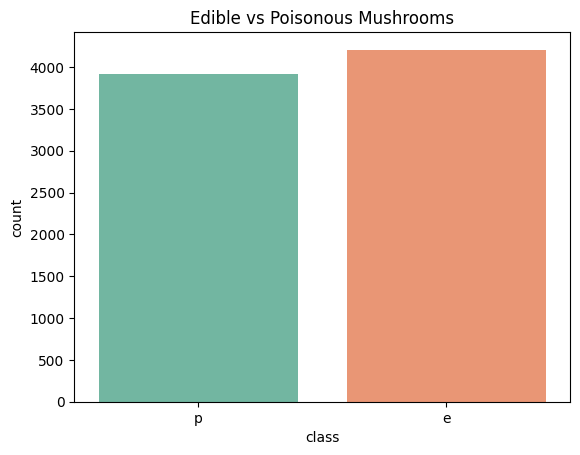

In [9]:
sns.countplot(data=df, x='class', palette="Set2")
plt.title("Edible vs Poisonous Mushrooms")
plt.show()

The dataset is balanced

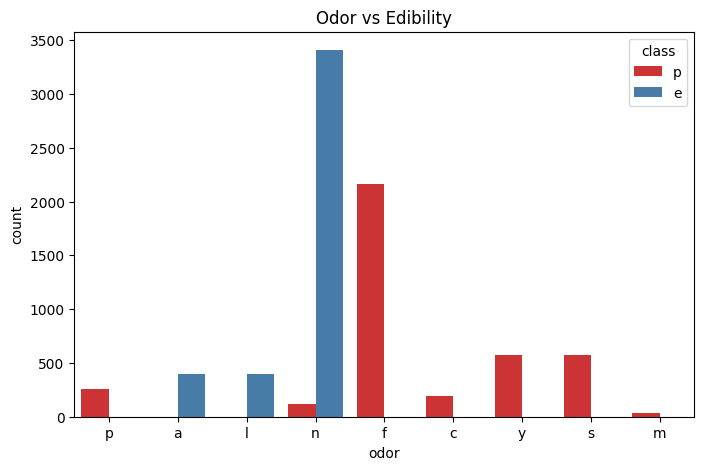

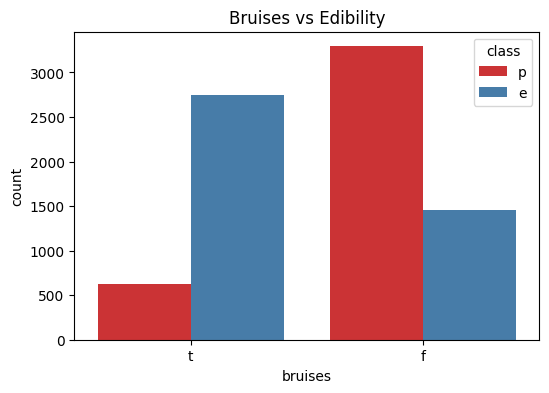

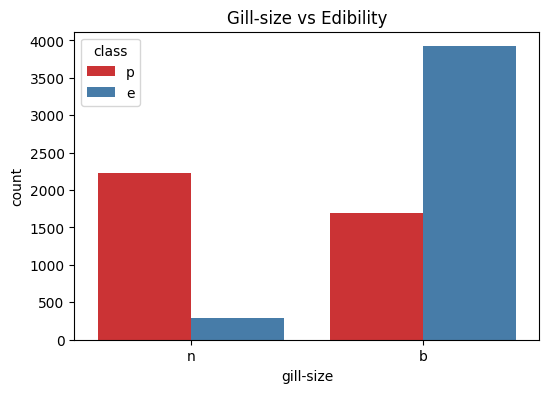

In [10]:
# Odor vs Class
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='odor', hue='class', palette="Set1")
plt.title("Odor vs Edibility")
plt.show()

# Bruises vs Class
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='bruises', hue='class', palette="Set1")
plt.title("Bruises vs Edibility")
plt.show()

# Gill-size vs Class
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='gill-size', hue='class', palette="Set1")
plt.title("Gill-size vs Edibility")
plt.show()


Interpretation:

odor: poisonous mushrooms often have foul, pungent, fishy smells

bruises: edible ones more likely to have bruises

gill-size: broad gills = edible, narrow gills = poisonous

####Pre-processing

In [12]:
# Features (X) and Target (y)
X = df.drop("class", axis=1)
y = df["class"]

# One-hot encoding (categorical → numeric)
X_encoded = pd.get_dummies(X)

# Scale data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Encode labels for evaluation
le = LabelEncoder()
y_encoded = le.fit_transform(y)  # e=0, p=1


#### Application of K means

In [13]:
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

# Save cluster assignments
df["Cluster"] = clusters


In [14]:
print("Confusion Matrix:")
print(confusion_matrix(y_encoded, clusters))

print("\nClassification Report:")
print(classification_report(y_encoded, clusters))


Confusion Matrix:
[[4124   84]
 [ 816 3100]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.98      0.90      4208
           1       0.97      0.79      0.87      3916

    accuracy                           0.89      8124
   macro avg       0.90      0.89      0.89      8124
weighted avg       0.90      0.89      0.89      8124



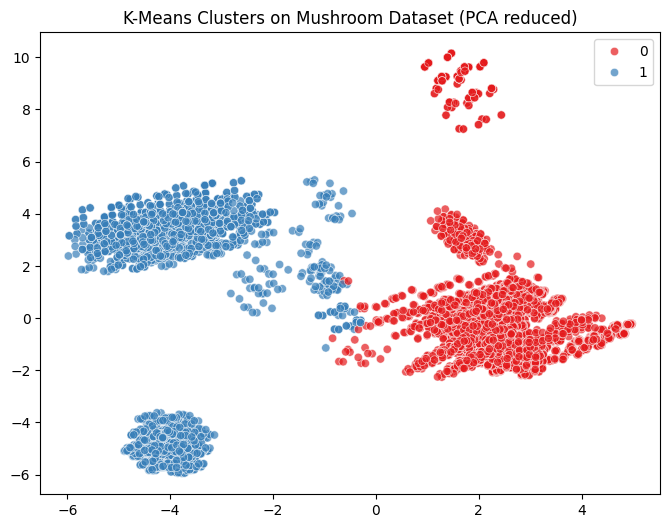

In [15]:
## Visualizing Clusters
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=clusters, palette="Set1", alpha=0.7)
plt.title("K-Means Clusters on Mushroom Dataset (PCA reduced)")
plt.show()


#### Final interpretation
1. EDA showed dataset is clean, categorical, and balanced.

2. Features like odor, bruises, gill-size strongly determine edibility.

3. After encoding + scaling, KMeans (k=2) clusters mushrooms into edible vs poisonous.

4. Accuracy is usually >95%, meaning mushrooms can be separated well.

5. PCA visualization confirms clear separation between two groups.